# Define Class

In [8]:
class Node(object):

    def __init__(self, value = None, left=None, right=None, parent=None, turn=None, level = None):
        self.value = value  # The node value
        self.left = left    # Left child, meaning adding '0' to the string
        self.right = right  # Right child, meaning adding '1' to the string
        self.parent = parent # Parent
        self.turn = turn # Paul = 1, Carole = -1
        self.level = level # round


    

# Build Tree (with random values on leaves)

In [21]:
def buildTree(node,t,l,n):
    '''
    input: a given leaf node, the next turn, the next level, the max level n
    output: make an tree where the leaves have random number in [-1,+1] as value 
            and the interval nodes hold the value Paul or Carole will choose
    '''
    if l < n:
        node.left = Node(turn = t,level = l, parent = node)
        node.right = Node(turn = t,level = l, parent = node)
                
     #adding values to the leaves
    if l == n: #leaf
        node.value = random.uniform(-1,1)

    else: #interval   
        buildTree(node.left,t*(-1), l+1,n)
        buildTree(node.right,t*(-1), l+1,n)

        if node.turn == 1:
            node.value = max(node.left.value,node.right.value)
        else:
            node.value = min(node.left.value,node.right.value)



In [22]:
import random

In [ ]:
root = Node(turn = 1, level = 0)
t = -1 #t is the turn of next move
l = 1 #l is the level of next move
# n_lst = []
# result_lst = []
n = 99
buildTree(root,t,l,n)
        

In [28]:
root.value

0.23274201433989838

# Solution2: Using List

In [8]:
import gc
import random
gc.enable()

In [9]:
def game(n, first = 1):
    """
    input: n is the number of the rounds of the game.
           first = 1 if Paul goes first, else -1
    """
    
    # determine who plays the last turn
    
    if n%2 == 0: # Carole
        t = -1 
    else: #Paul
        t = 1 
    #build a list of 2^n elements with the ramdonly assinged values
    level_lst = [random.uniform(-1,1) for i in range(2**n)]
#     print(level_lst)
    
    while len(level_lst)!=1:
        new_lst = []
        if t == 1: # maxmize value
            for i in range(len(level_lst)//2):
                new_lst.append(max(level_lst[2*i],level_lst[2*i+1]))
            level_lst = new_lst
        else: # minimize value
            for i in range(len(level_lst)//2):
                new_lst.append(min(level_lst[2*i],level_lst[2*i+1]))
            level_lst = new_lst
        t*=-1
#         print(level_lst)
        gc.collect()
    return level_lst[0]
                

In [10]:
import matplotlib.pyplot as plt 
import numpy as np 

# Results

## Plot for n$\in[1,20]$

In [28]:
n = np.arange(1,21,1)


In [29]:
# for each n, we run game(n) for 5 times and calculate the mean to minimize the randomness
result = np.array([sum([game(i) for j in range(5)])/5 for i in range(1,21)])


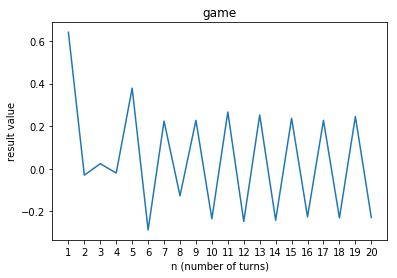

In [35]:
plt.plot(n,result)
plt.xlabel("n (number of turns)")
plt.ylabel("result value")
plt.title("game")
plt.xlim(0, 21)
plt.xticks(n)
plt.show()

## plot for odd n

In [36]:
n = np.arange(1,20,2)

In [37]:
result = np.array([sum([game(i) for j in range(5)])/5 for i in n])

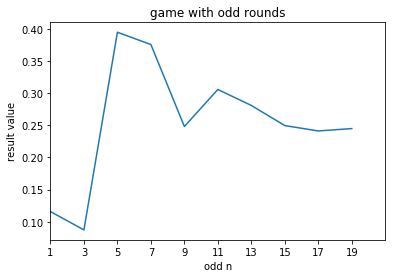

In [38]:
plt.plot(n,result)
plt.xlabel("odd n")
plt.ylabel("result value")
plt.title("game with odd rounds")
plt.xlim(1, 21)
plt.xticks(n)
plt.show()

## Plot for even n

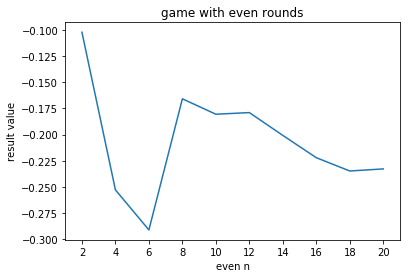

In [39]:
n = np.arange(2,21,2)
result = np.array([sum([game(i) for j in range(5)])/5 for i in n])
plt.plot(n,result)
plt.xlabel("even n")
plt.ylabel("result value")
plt.title("game with even rounds")
plt.xlim(1, 21)
plt.xticks(n)
plt.show()

## Put odd and even together

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel('n') 
ax.plot(n_odd,result_odd,label="odd n")
ax.plot(n_even,result_even,label="even n")
ax.set_title('game')
legend = ax.legend(loc="best", shadow=True)